In [1]:
!pip install arviz
!pip install pymc3==3.8

     |████████████████████████████████| 1.5MB 6.2MB/s 
     |████████████████████████████████| 737kB 18.9MB/s 
     |████████████████████████████████| 4.7MB 27.6MB/s 
     |████████████████████████████████| 296kB 51.0MB/s 
  Found existing installation: xarray 0.15.1
    Uninstalling xarray-0.15.1:
      Successfully uninstalled xarray-0.15.1
     |████████████████████████████████| 911kB 5.0MB/s 
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7


In [2]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
import theano.tensor as tt

from scipy import stats
from scipy.special import expit as logistic

In [3]:
def scatter_plot(x, y):
  plt.figure(figsize=(10, 10))
  for idx, x_i in enumerate(x.T):
    plt.subplot(2, 2, idx+1)
    plt.scatter(x_i, y)
    plt.xlabel(f'x_{idx+1}')
    plt.ylabel(f'y', rotation=0)
    plt.subplot(2, 2, idx+2)
    plt.scatter(x[:, 0], x[:, 1])
    plt.xlabel(f'x_{idx}')
    plt.ylabel(f'x_{idx+1}', rotation=0)

(100,)
(100,)
(100, 2)
(100,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


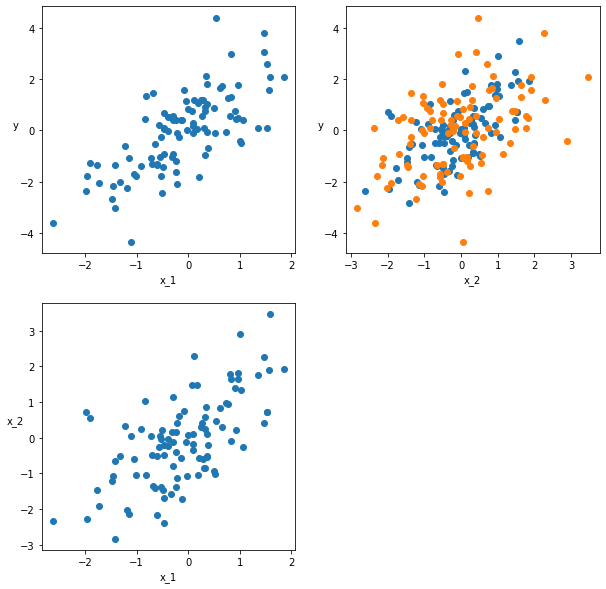

In [4]:
np.random.seed(42)
N = 100
x_1 = np.random.normal(size=N)
x_2 = x_1 + np.random.normal(size=N, scale=1)
#x_2 = x_1 + np.random.normal(size=N, scale=0.01)
print(x_1.shape)
print(x_2.shape)
y = x_1 + np.random.normal(size=N)
X = np.vstack((x_1, x_2)).T
print(X.shape)
print(y.shape)
# scatter_plot(x_1, x_2)
scatter_plot(X, y)

In [5]:
with pm.Model() as m_x1x2:
  α = pm.Normal('α', mu=0, sd=10)
  β1 = pm.Normal('β1', mu=0, sd=10)
  β2 = pm.Normal('β2', mu=0, sd=10)
  ϵ = pm.HalfCauchy('ϵ', 5)
  μ = α + β1 * X[:, 0] + β2 * X[:, 1]
  y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)
  trace_x1x2 = pm.sample(2000)
with pm.Model() as m_x1:
  α = pm.Normal('α', mu=0, sd=10)
  β1 = pm.Normal('β1', mu=0, sd=10)
  ϵ = pm.HalfCauchy('ϵ', 5)
  μ = α + β1 * X[:, 0]
  y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)
  trace_x1 = pm.sample(2000)
with pm.Model() as m_x2:
  α = pm.Normal('α', mu=0, sd=10)
  β2 = pm.Normal('β2', mu=0, sd=10)
  ϵ = pm.HalfCauchy('ϵ', 5)
  μ = α + β2 * X[:, 1]
  y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)
  trace_x2 = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ϵ, β2, β1, α]
Sampling chain 1, 0 divergences: 100%|██████████| 2500/2500 [00:02<00:00, 1051.04it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ϵ, β1, α]
Sampling chain 1, 0 divergences: 100%|██████████| 2500/2500 [00:01<00:00, 1480.02it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ϵ, β2, α]
Sampling chain 1, 0 divergences: 100%|██████████| 2500/2500 [00:01<00:00, 1510.78it/s]


/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5625692e10>],
      dtype=object)

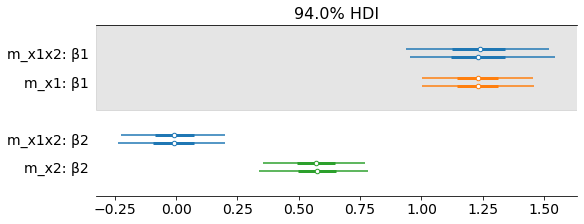

In [6]:
az.plot_forest([trace_x1x2, trace_x1, trace_x2],
 model_names=['m_x1x2', 'm_x1', 'm_x2'],
 var_names=['β1', 'β2'],
 combined=False, colors='cycle', figsize=(8, 3))